In [ ]:
pwd

'/content'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Preprocessing


### Creating Train, Validation and Test Folders (One Time Execution)

### Using the following code train, validation and test data folders were divided into ratio 70:15:15

In [ ]:
# import os
# import numpy as np
# import shutil
# import random


# source = '/content/drive/My Drive/Thesis_Natural_Images/Natural_images'
# data_folder = '/content/drive/My Drive/Thesis_Natural_Images/Dataset'
# classes_list = ['/airplane','/car','/cat','/dog','/flower','/fruit','/motorbike','/person']
# val_ratio = 0.15
# test_ratio = 0.15

# # Creating Train/ Validation/ Test folders (One Time)

# for cls in classes_list:
#   os.makedirs(data_folder + '/Train' + cls)
#   os.makedirs(data_folder + '/Validation' + cls)
#   os.makedirs(data_folder + '/Test' + cls)
  
#   images_cls = source + cls # Folder from where images will be copied
  
#   all_images = os.listdir(images_cls)
#   np.random.shuffle(all_images)
#   train_images, val_images, test_images = np.split(np.array(all_images), [int(len(all_images) * (1 - (test_ratio + val_ratio))), int(len(all_images) * (1 - test_ratio))])
        
#   train_images = [images_cls + '/' + name for name in train_images.tolist()]
#   val_images = [images_cls + '/' + name for name in val_images.tolist()]
#   test_images = [images_cls + '/' + name for name in test_images.tolist()]
        
#   print("Total no. of " + cls + " images: ", len(all_images))
#   print("No. of Training images: ", len(train_images))
#   print("No. of Validation images", len(val_images))
#   print("No. of Test images", len(test_images))
        
#   # Copying images and Pasting it to Train/ Validation/ Test Folders
#   for name in train_images:
#     shutil.copy(name, data_folder + '/Train' + cls)
#   for name in val_images:
#     shutil.copy(name, data_folder + '/Validation' + cls)
#   for name in test_images:
#     shutil.copy(name, data_folder + '/Test' + cls)

Total no. of /airplane images:  727
No. of Training images:  508
No. of Validation images 109
No. of Test images 110
Total no. of /car images:  968
No. of Training images:  677
No. of Validation images 145
No. of Test images 146
Total no. of /cat images:  885
No. of Training images:  619
No. of Validation images 133
No. of Test images 133
Total no. of /dog images:  702
No. of Training images:  491
No. of Validation images 105
No. of Test images 106
Total no. of /flower images:  843
No. of Training images:  590
No. of Validation images 126
No. of Test images 127
Total no. of /fruit images:  1000
No. of Training images:  700
No. of Validation images 150
No. of Test images 150
Total no. of /motorbike images:  788
No. of Training images:  551
No. of Validation images 118
No. of Test images 119
Total no. of /person images:  986
No. of Training images:  690
No. of Validation images 148
No. of Test images 148


## Import libraries

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.densenet import preprocess_input
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPool2D, BatchNormalization
from keras import layers, Model
from tensorflow.keras.models import Sequential
from keras.optimizers import Adam
import matplotlib
from matplotlib import pyplot as plt
import keras
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

## EDA

Text(0.5, 1.0, 'Number of Training images per Class:')

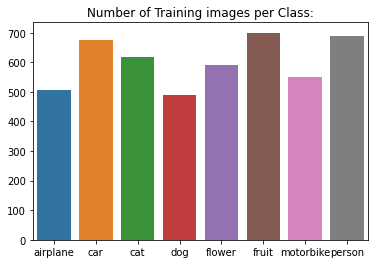

In [ ]:
train_data_dir = "/content/drive/My Drive/Thesis_Natural_Images/Dataset/Train"
val_data_dir = "/content/drive/My Drive/Thesis_Natural_Images/Dataset/Validation/"
test_data_dir = "/content/drive/My Drive/Thesis_Natural_Images/Dataset/Test/"
class_names = sorted(os.listdir(train_data_dir))

train_img_cat = []
val_img_cat = []
test_img_cat = []
for classes in class_names:
    train_folder = train_data_dir + '/' + classes
    train_img_cat.append(len(os.listdir(train_folder)))

for classes in class_names:
    val_folder = val_data_dir + '/' + classes
    val_img_cat.append(len(os.listdir(val_folder)))

for classes in class_names:
    test_folder = test_data_dir + '/' + classes
    test_img_cat.append(len(os.listdir(test_folder)))

sns.barplot(x=class_names, y=train_img_cat).set_title("Number of Training images per Class:")

Text(0.5, 1.0, 'Number of Validation images per Class:')

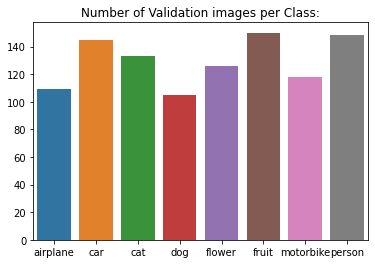

In [ ]:
sns.barplot(x=class_names, y=val_img_cat).set_title("Number of Validation images per Class:")

Text(0.5, 1.0, 'Number of Testing images per Class:')

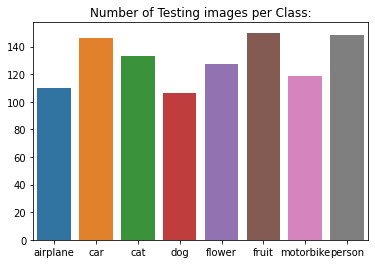

In [ ]:
sns.barplot(x=class_names, y=test_img_cat).set_title("Number of Testing images per Class:")

## Data Pre-processing


### Data Augumentation using ImageDataGenerator

In [ ]:
# pre processing using keras - flow from directory
# normalising
train_generator = ImageDataGenerator(rescale= 1.0/255,
                           rotation_range=10,
                           zoom_range=0.1,
                           width_shift_range=0.1,
                           height_shift_range=0.1,
                           horizontal_flip=False,
                           brightness_range=(0.9,1.1),
                           fill_mode='nearest'
                           )
val_generator = ImageDataGenerator(rescale=1.0/255)
test_generator = ImageDataGenerator(rescale=1.0/255)

train = train_generator.flow_from_directory('/content/drive/My Drive/Thesis_Natural_Images/Dataset/Train/',target_size=(256,256), class_mode='categorical', batch_size=64, shuffle=False)
val = val_generator.flow_from_directory('/content/drive/My Drive/Thesis_Natural_Images/Dataset/Validation/', target_size=(256,256), class_mode='categorical', batch_size=64, shuffle=False)
test = test_generator.flow_from_directory('/content/drive/My Drive/Thesis_Natural_Images/Dataset/Test/', target_size=(256,256), class_mode='categorical', batch_size=64, shuffle=False)

Found 4826 images belonging to 8 classes.
Found 1034 images belonging to 8 classes.
Found 1039 images belonging to 8 classes.


## CNN Model

In [ ]:
def CNN():

  model = Sequential()

  image_shape = input_shape=(256,256,3)
  # 1st conv
  model.add(Conv2D(25, (5,5), activation='relu',strides=(1,1), padding='same', input_shape= image_shape))
  model.add(MaxPool2D(pool_size=(2,2), padding='same'))

  #2nd conv
  model.add(Conv2D(50, (5,5), activation='relu',strides=(2,2), padding='same', input_shape= image_shape))
  model.add(MaxPool2D(pool_size=(2,2), padding='same'))
  model.add(BatchNormalization())

  #3rd conv
  model.add(Conv2D(75, (5,5), activation='relu',strides=(2,2), padding='same', input_shape= image_shape))
  model.add(MaxPool2D(pool_size=(2,2), padding='valid'))
  model.add(BatchNormalization())

  # ANN dense network
  model.add(Flatten())
  model.add(Dense(units=100, activation='relu'))
  model.add(Dense(units=100, activation='relu'))
  model.add(Dropout(0.25))

  # output layer
  model.add(Dense(units=8, activation='softmax'))

  # parameter setting
  model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

  return model

## Training Model

In [ ]:
# fit/train model with data
Cnn = CNN()

results = Cnn.fit_generator(train, epochs=30, steps_per_epoch=20, validation_data=val)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
20/20 [==============================] - 1150s 58s/step - loss: 2.5470 - accuracy: 0.2219 - val_loss: 1.9349 - val_accuracy: 0.2311
Epoch 2/30
20/20 [==============================] - 486s 24s/step - loss: 2.0753 - accuracy: 0.3164 - val_loss: 2.0006 - val_accuracy: 0.1954
Epoch 3/30
20/20 [==============================] - 376s 19s/step - loss: 1.6758 - accuracy: 0.4242 - val_loss: 1.8203 - val_accuracy: 0.2795
Epoch 4/30
20/20 [==============================] - 338s 17s/step - loss: 1.3654 - accuracy: 0.5680 - val_loss: 1.5532 - val_accuracy: 0.3868
Epoch 5/30
20/20 [==============================] - 265s 13s/step - loss: 1.3224 - accuracy: 0.5430 - val_loss: 1.6999 - val_accuracy: 0.3936
Epoch 6/30
20/20 [==============================] - 242s 12s/step - loss: 1.3834 - accuracy: 0.5375 - val_loss: 1.3135 - val_accuracy: 0.4932
Epoch 7/30
20/20 [==============================] - 242s 12s/step - los

In [ ]:
Cnn.save('/content/drive/MyDrive/Thesis_Natural_Images/CNN.h5')

In [ ]:
C_N_N = keras.models.load_model('/content/drive/MyDrive/Thesis_Natural_Images/CNN.h5')

## Prediction

In [ ]:
prediction = C_N_N.evaluate(test)
prediction

17/17 [==============================] - 514s 30s/step - loss: 0.9518 - accuracy: 0.7170


[0.9517570734024048, 0.7170355916023254]

## Model Evaluation

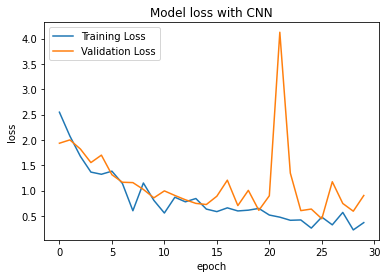

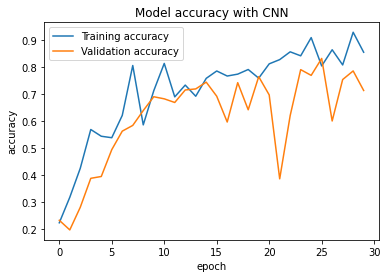

In [ ]:
# Plot.py
import matplotlib
from matplotlib import pyplot as plt

plt.plot(results.history['loss'], label='Training Loss')
plt.plot(results.history['val_loss'], label='Validation Loss')
plt.title('Model loss with CNN')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

plt.plot(results.history['accuracy'], label='Training accuracy')
plt.plot(results.history['val_accuracy'], label='Validation accuracy')
plt.title('Model accuracy with CNN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

## Confusion Matrix

In [ ]:
import itertools
import numpy as np


def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
#Confution Matrix and Classification Report

Y_pred = C_N_N.predict(test, 32)
y_pred = np.argmax(Y_pred, axis=1)

In [ ]:
cm = confusion_matrix(test.classes, y_pred)
cm_plot_labels = class_names
print(cm_plot_labels)

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']


Confusion matrix, without normalization
[[ 84   1   0   1  23   0   0   1]
 [  0 104   3   7  23   0   8   1]
 [  0   0  49  13  65   0   1   5]
 [  1   0  14  43  44   0   1   3]
 [  1   1   8   9 102   0   5   1]
 [  3   1   0   3   1 122   0  20]
 [  0   0   1   2   9   0 107   0]
 [  1   0   1   0  12   0   0 134]]
None


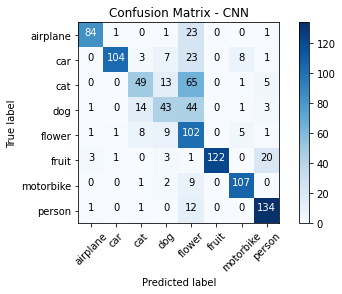

In [ ]:
print(plot_confusion_matrix(cm, classes = cm_plot_labels, title='Confusion Matrix - CNN', normalize=False))

## Classification Report

In [ ]:
print('Classification Report for CNN')
print(classification_report(test.classes, y_pred, target_names=class_names))

Classification Report for CNN
              precision    recall  f1-score   support

    airplane       0.93      0.76      0.84       110
         car       0.97      0.71      0.82       146
         cat       0.64      0.37      0.47       133
         dog       0.55      0.41      0.47       106
      flower       0.37      0.80      0.50       127
       fruit       1.00      0.81      0.90       150
   motorbike       0.88      0.90      0.89       119
      person       0.81      0.91      0.86       148

    accuracy                           0.72      1039
   macro avg       0.77      0.71      0.72      1039
weighted avg       0.78      0.72      0.73      1039

